# 自制数据集

In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from keras import Model
from tensorflow.keras import Model
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # 使用 GPU 1
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0],True)
logical_devices = tf.config.list_logical_devices("GPU")

In [2]:
os.getcwd()

'/home/wy'

In [3]:
root_path = 'tensorflow_study/chapter4'
data_root_path = os.path.join(root_path, 'data_dir/food-11/')
os.path.exists(data_root_path)

True

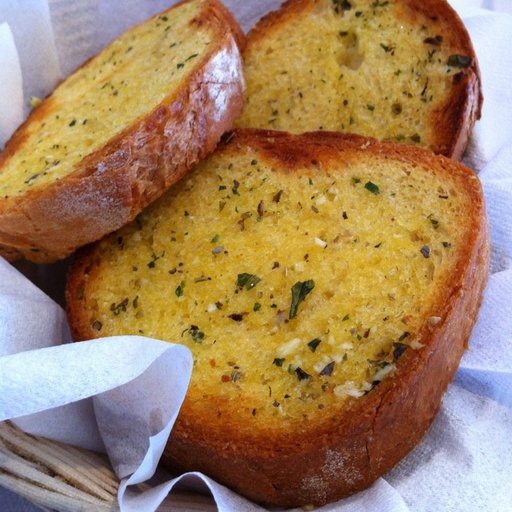

In [4]:
test_pic_path = data_root_path + 'training/labeled/00/0_0.jpg'
test_pic = Image.open(test_pic_path)
test_pic

In [5]:
test_pic_np = np.array(test_pic.resize((128,128)))
test_pic_np.shape

(128, 128, 3)

In [6]:
def generate_img_label(path:str):
    """
    根据路径加载图片 获得Label和图像的numpy表示
    :param path: 图片路径
    :return: 图像的np表示, label
    """
    file_name = path.split('/')[-1]
    label = file_name.split('_')[0]
    img = Image.open(path)
    img = img.resize((128, 128))
    img_np = np.array(img)
    img_np = img_np / 255
    return img_np, int(label)

def generate_img_for_test(path:str):
    """
    根据路径加载图片 图像的numpy表示
    :param path: 图片路径
    :return: 图像的np表示
    """
    img = Image.open(path)
    img = img.resize((128, 128))
    img_np = np.array(img)
    img_np = img_np / 255
    return img_np

In [7]:
train_data_path = data_root_path + 'training/labeled/'
valid_data_path = data_root_path + 'validation/'
test_data_path = data_root_path + 'testing/00/'

In [8]:
def load_data(mode = 'train'):
    if mode == 'train':
        data_path = train_data_path
    elif mode == 'valid':
        data_path = valid_data_path
    else:
        return None

    x = list()
    y = list()
    all_dirs = os.listdir(data_path)
    for each_dir in all_dirs:
        each_dir_path = os.path.join(data_path, each_dir)
        all_files = os.listdir(each_dir_path)
        for each_file in all_files:
            each_file_path = os.path.join(each_dir_path, each_file)
            each_x, each_y = generate_img_label(each_file_path)
            assert each_x.shape == (128, 128, 3)
            x.append(each_x)
            y.append(each_y)
    return x, y

In [9]:
train_x, train_y = load_data(mode='train')

In [10]:
train_x_np = np.array(train_x)
train_y_np = np.array(train_y)

In [20]:
print('train_x_shape: ', train_x_np.shape)
print('train_y_shape: ', train_y_np.shape)
print(train_x_np.dtype)
print(train_y_np.dtype)

train_x_shape:  (3080, 128, 128, 3)
train_y_shape:  (3080,)
float64
int64


In [13]:
valid_x, valid_y = load_data(mode='valid')

In [14]:
valid_x_np = np.array(valid_x)
valid_y_np = np.array(valid_y)

In [15]:
print('valid_x_shape: ', valid_x_np.shape)
print('valid_y_shape: ', valid_y_np.shape)

valid_x_shape:  (660, 128, 128, 3)
valid_y_shape:  (660,)


In [ ]:
# keras不使用dataset类似的东西 直接用numpy作为输入就可以

In [16]:
# 使用class形式进行构建
# 简单的模型
# 模型的目标并不是要真正进行分类 本ipynb的目的是体验dataset的过程

class FoodClassifyModel(Model):
    def __init__(self):
        super(FoodClassifyModel, self).__init__()
        self.flatten = keras.layers.Flatten()
        self.d1 = keras.layers.Dense(units=128, activation='relu')
        self.d2 = keras.layers.Dense(units=11, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y

model = FoodClassifyModel()

In [17]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy']
)

In [22]:
model.fit(train_x_np, train_y_np, batch_size=128, epochs=20, validation_data=(valid_x_np, valid_y_np), validation_freq=1)

Epoch 1/20
25/25 [==============================] - 1s 26ms/step - loss: 2.3970 - sparse_categorical_accuracy: 0.0919 - val_loss: 2.3976 - val_sparse_categorical_accuracy: 0.0909
Epoch 2/20
25/25 [==============================] - 0s 14ms/step - loss: 2.3951 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3980 - val_sparse_categorical_accuracy: 0.0909
Epoch 3/20
25/25 [==============================] - 0s 14ms/step - loss: 2.3975 - sparse_categorical_accuracy: 0.0912 - val_loss: 2.3981 - val_sparse_categorical_accuracy: 0.0909
Epoch 4/20
25/25 [==============================] - 0s 14ms/step - loss: 2.3977 - sparse_categorical_accuracy: 0.0851 - val_loss: 2.3980 - val_sparse_categorical_accuracy: 0.0924
Epoch 5/20
25/25 [==============================] - 0s 14ms/step - loss: 2.3955 - sparse_categorical_accuracy: 0.0942 - val_loss: 2.4015 - val_sparse_categorical_accuracy: 0.0985
Epoch 6/20
25/25 [==============================] - 0s 16ms/step - loss: 2.3970 - sparse_categorical_accu

In [23]:
model.summary()

Model: "food_classify_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  6291584   
                                                                 
 dense_1 (Dense)             multiple                  1419      
                                                                 
Total params: 6,293,003
Trainable params: 6,293,003
Non-trainable params: 0
_________________________________________________________________


# 图像数据增强
preprocessing.image.ImageDataGenerator()
fit()

In [24]:
img_gen_train = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./1.,
    rotation_range= 45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=False,
    zoom_range=0.2
)

In [25]:
img_gen_train.fit(train_x_np)
# 进行数据增强

In [27]:
model.fit(train_x_np, train_y_np, batch_size=128, epochs=20, validation_data=(valid_x_np, valid_y_np), validation_freq=1)

Epoch 1/20
25/25 [==============================] - 1s 32ms/step - loss: 2.3926 - sparse_categorical_accuracy: 0.0932 - val_loss: 2.3924 - val_sparse_categorical_accuracy: 0.0924
Epoch 2/20
25/25 [==============================] - 0s 19ms/step - loss: 2.3901 - sparse_categorical_accuracy: 0.0890 - val_loss: 2.3984 - val_sparse_categorical_accuracy: 0.0864
Epoch 3/20
25/25 [==============================] - 0s 18ms/step - loss: 2.3866 - sparse_categorical_accuracy: 0.1019 - val_loss: 2.3978 - val_sparse_categorical_accuracy: 0.0894
Epoch 4/20
25/25 [==============================] - 0s 16ms/step - loss: 2.3882 - sparse_categorical_accuracy: 0.1003 - val_loss: 2.3903 - val_sparse_categorical_accuracy: 0.0985
Epoch 5/20
25/25 [==============================] - 0s 17ms/step - loss: 2.3852 - sparse_categorical_accuracy: 0.0974 - val_loss: 2.3913 - val_sparse_categorical_accuracy: 0.0955
Epoch 6/20
25/25 [==============================] - 0s 16ms/step - loss: 2.3856 - sparse_categorical_accu